In [ ]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Dataset_B_hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#**DATASET B (Hotel)**


---


- Booking_ID = Pengenal unik dari tiap pemesanan

- no_of_adults = Jumlah orang dewasa

- no_of_children = Jumlah anak kecil

- no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel

- no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel

- type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan

- required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1 - Ya)

- room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels

- lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan

- arrival_year = Tahun tanggal kedatangan

- arrival_month = Bulan tanggal kedatangan

- arrival_date = Tanggal kedatangan

- market_segment_type = Penunjukan segmen pasar

- repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1 - Ya)

- no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini

- no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini

- avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro)

- no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan lain-lain)

- booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak

#EDA

In [ ]:
# Check for data types, null values, and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- Dataset berisi 36.275 data pemesanan hotel dengan 19 kolom.

- Terdapat data yang hilang di 3 kolom: type_of_meal_plan,
required_car_parking_space, dan avg_price_per_room.

- Semua tipe data sudah sesuai dengan isi kolomnya


###Check Missing Value

In [ ]:
#check missing value
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


Terdapat missing value di 3 kolom:

- type_of_meal_plan sebanyak 907 data hilang

- required_car_parking_space sebanyak 1.270 data hilang

- avg_price_per_room sebanyak 1.632 data hilang

##Check Duplicate Data

In [ ]:
print(df.duplicated().sum())

0


Tidak ada yang terduplikat

##Target Variable Distribution

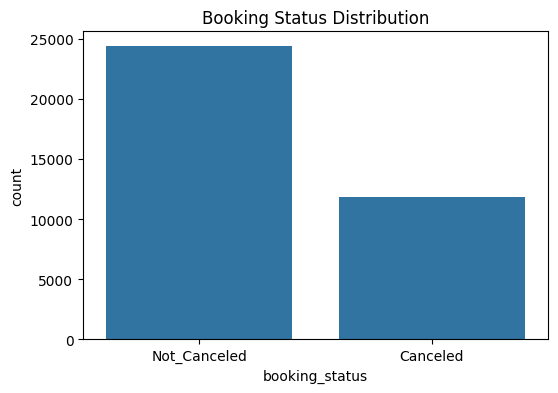

In [ ]:
# Check target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='booking_status', data=df)
plt.title('Booking Status Distribution')
plt.show()

Jumlah pelanggan yang melanjutkan pemesananya / tidak dibatalkan (Not_Canceled) jauh lebih banyak dibandingkan pelanggan yang membatalkan pemesananya (Canceled).

- Not_Canceled mendekati angka 25.000

- Canceled mendekati angka 12.000

In [ ]:
df['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


kalau kita liat lebih detail lagi ada sekitar

- Not_Canceled = 24.390

- Canceled = 11.885

##Numerical Column Distribution

In [ ]:
# Explore numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


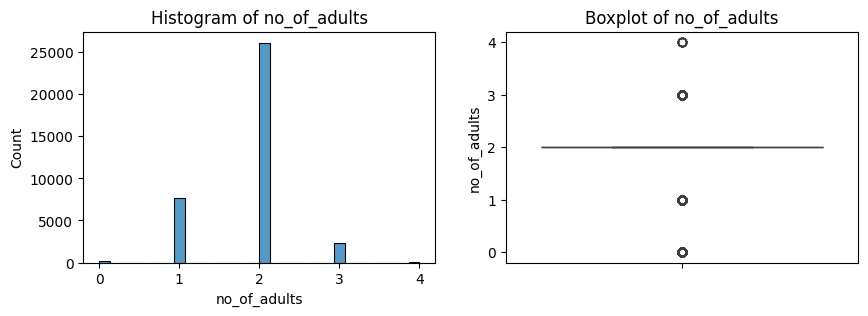

no_of_adults- skewness: -0.3332949302307013
no_of_adults- kurtosis: 0.8148219649541883


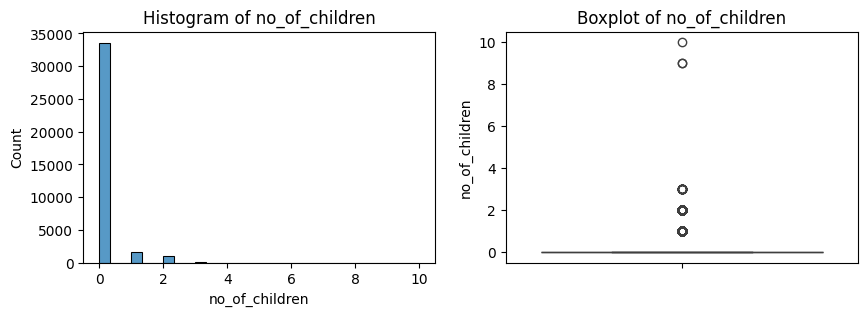

no_of_children- skewness: 4.710349518506961
no_of_children- kurtosis: 36.98185590119308


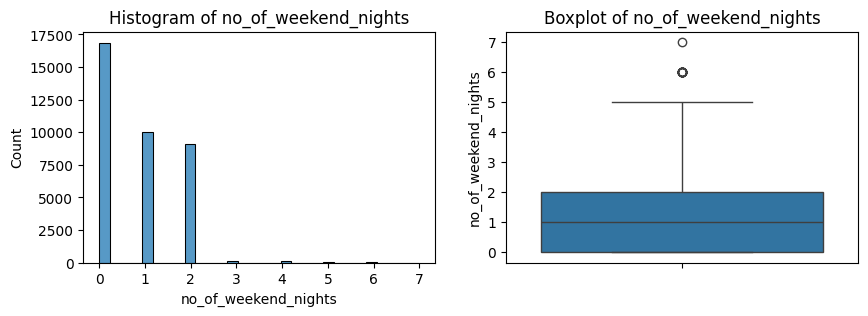

no_of_weekend_nights- skewness: 0.7376159576059308
no_of_weekend_nights- kurtosis: 0.2988575627243817


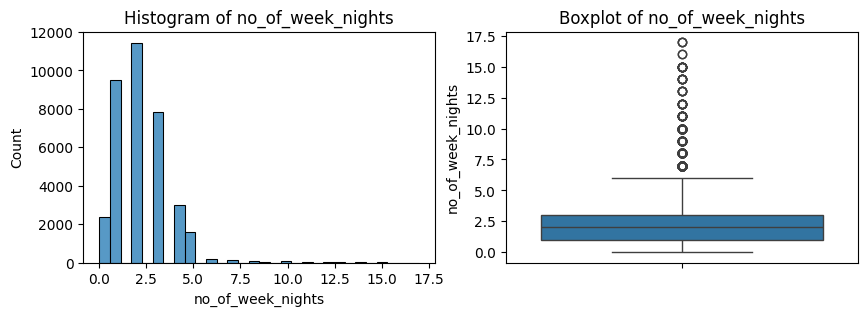

no_of_week_nights- skewness: 1.5993503651924639
no_of_week_nights- kurtosis: 7.798283949094243


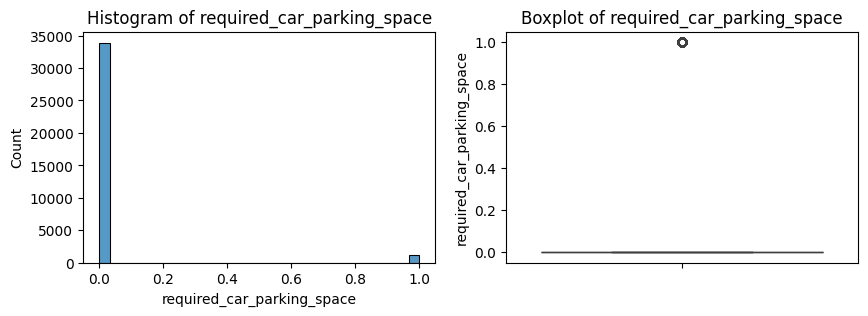

required_car_parking_space- skewness: 5.385426024544934
required_car_parking_space- kurtosis: 27.00435634824871


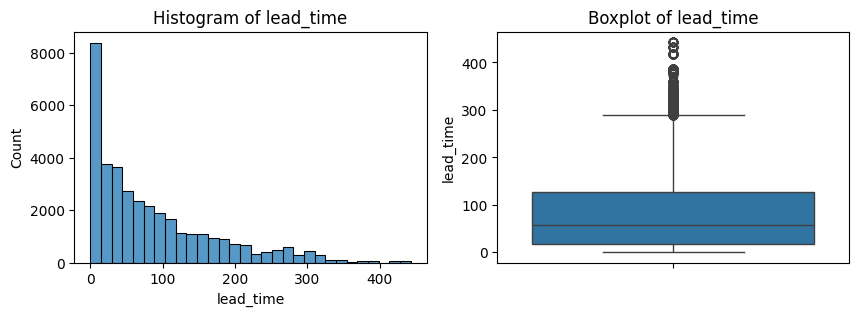

lead_time- skewness: 1.2924915330710838
lead_time- kurtosis: 1.1795940897790458


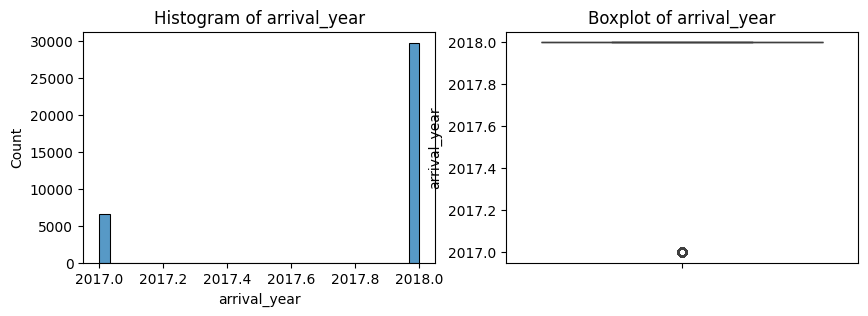

arrival_year- skewness: -1.6696953495540467
arrival_year- kurtosis: 0.787925999101224


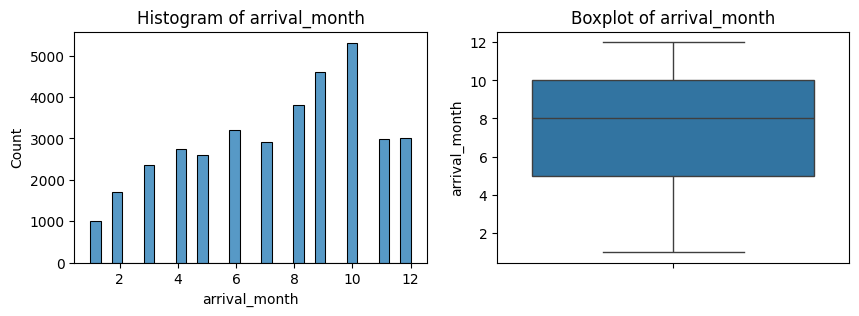

arrival_month- skewness: -0.34822885187738667
arrival_month- kurtosis: -0.9331889568857163


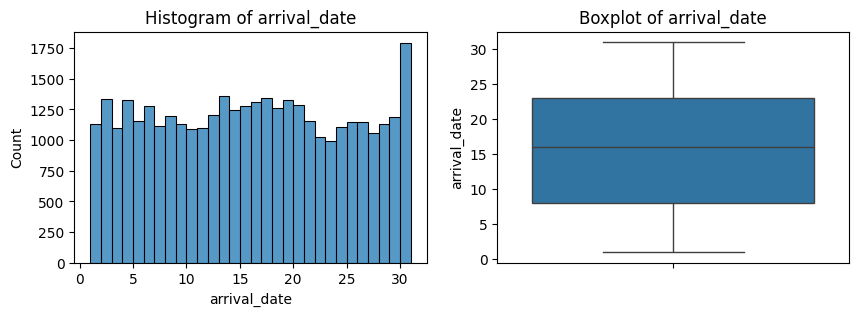

arrival_date- skewness: 0.028808569139449704
arrival_date- kurtosis: -1.157213970073237


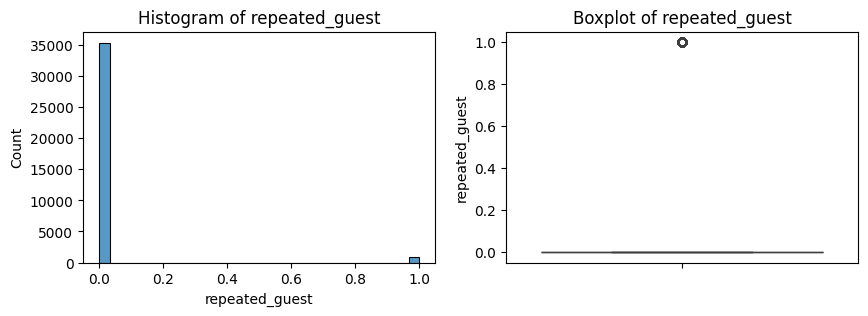

repeated_guest- skewness: 6.002888347093901
repeated_guest- kurtosis: 34.03654508879247


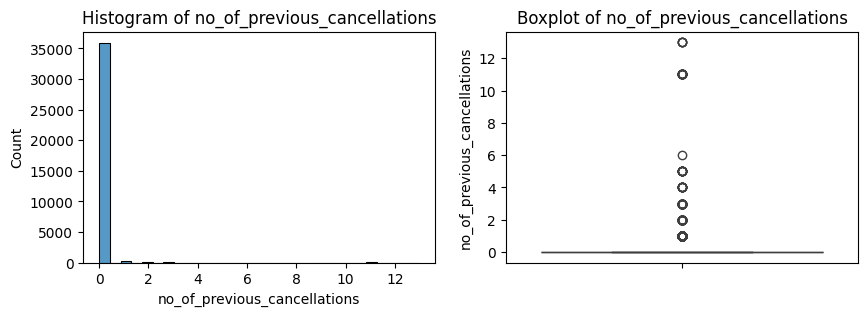

no_of_previous_cancellations- skewness: 25.199875952075615
no_of_previous_cancellations- kurtosis: 732.7356755507192


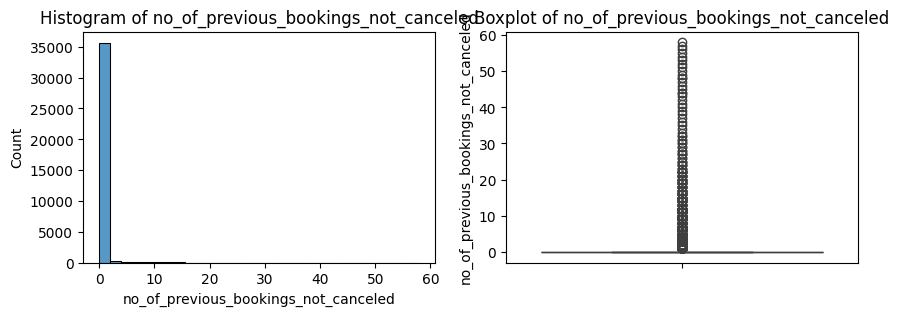

no_of_previous_bookings_not_canceled- skewness: 19.250190677395846
no_of_previous_bookings_not_canceled- kurtosis: 457.3800851716296


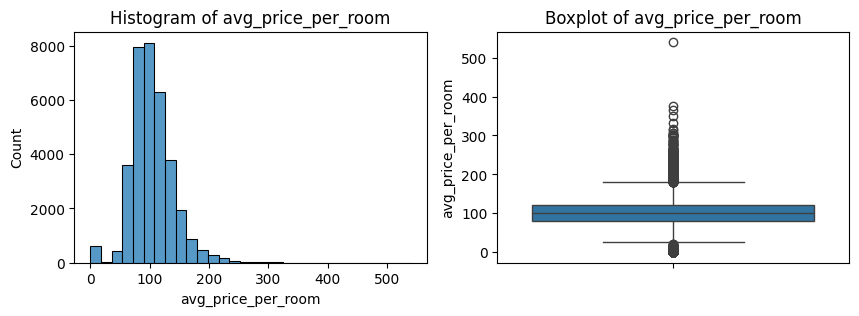

avg_price_per_room- skewness: 0.6654046613647858
avg_price_per_room- kurtosis: 3.1957401487168973


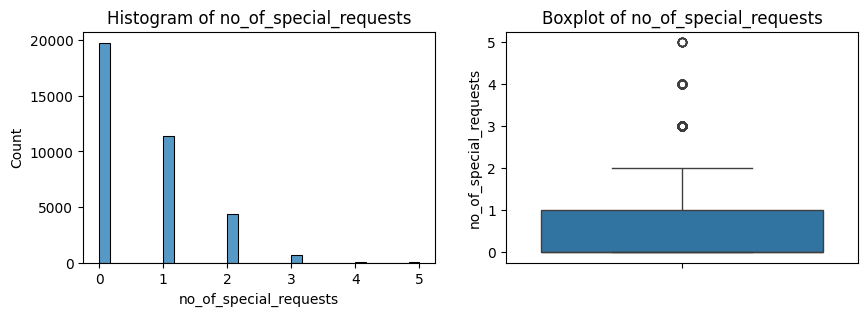

no_of_special_requests- skewness: 1.145080771394943
no_of_special_requests- kurtosis: 0.8814370153528488


In [ ]:
def dist_plot(df, num_cols):
  for i in num_cols:
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=30)
    plt.title(f"Histogram of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")

    plt.show()

    print(f"{i}- skewness: {df[i].skew()}")
    print(f"{i}- kurtosis: {df[i].kurt()}")

dist_plot(df,num_cols)

dari grafik histogram dan boxplot diatas kita bisa lihat bahwa ada beberapa yang tidak berdistribusi normal dan memiliki outlier


1. no_of_children (Jumlah Anak):

- Sebagian besar individu tidak memiliki anak.
- Distribusi jumlah anak sangat miring ke kanan, dengan beberapa outlier yang memiliki jumlah anak yang jauh lebih banyak.
2. no_of_adults (Jumlah Orang Dewasa):

- Jumlah orang dewasa yang paling umum adalah 2, diikuti oleh 1.
- Sebagian besar data terkonsentrasi pada 1 dan 2 orang dewasa.
- Terdapat beberapa outlier dengan jumlah orang dewasa 0 dan 4.
3. no_of_weekend_nights (Jumlah Malam Minggu):

- Sebagian besar observasi tidak mencakup menginap di malam minggu (0 malam).
- Jumlah malam minggu cenderung rendah dan sangat miring ke kanan.
- Terdapat beberapa outlier dengan jumlah malam minggu yang lebih tinggi (6 dan 7).
4. no_of_week_nights (Jumlah Malam Hari Kerja):

- Jumlah malam hari kerja yang paling umum adalah 1 dan 2.
- Sebagian besar observasi menunjukkan antara 0 hingga 6 malam hari kerja.
- Distribusi jumlah malam hari kerja miring ke kanan, dengan banyak outlier yang mengindikasikan beberapa observasi dengan masa inap yang sangat panjang selama hari kerja.
5. required_car_parking_space (Ruang Parkir Mobil yang Dibutuhkan):

- Sebagian besar observasi tidak memerlukan ruang parkir mobil (nilai 0).
- Terdapat juga sejumlah observasi yang memerlukan 1 unit ruang parkir mobil (nilai 1).
- Variabel ini bersifat kategorikal atau diskrit dengan dua nilai yang dominan.
6. repeated_guest (Tamu Berulang):

- Sebagian besar observasi adalah bukan tamu berulang (nilai 0).
- Hanya sebagian kecil observasi yang merupakan tamu berulang (nilai 1).
- Variabel ini kemungkinan merupakan variabel biner yang menunjukkan status tamu.

##Categorical Column Distribution

In [ ]:
# Explore categorical features
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')


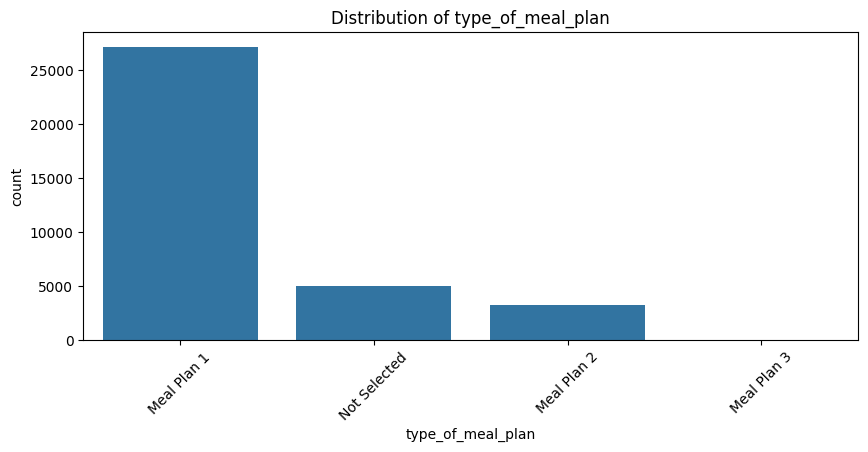

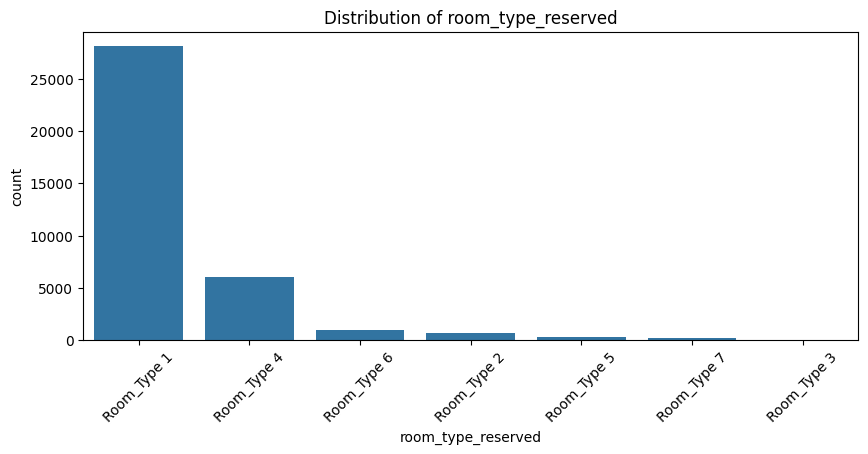

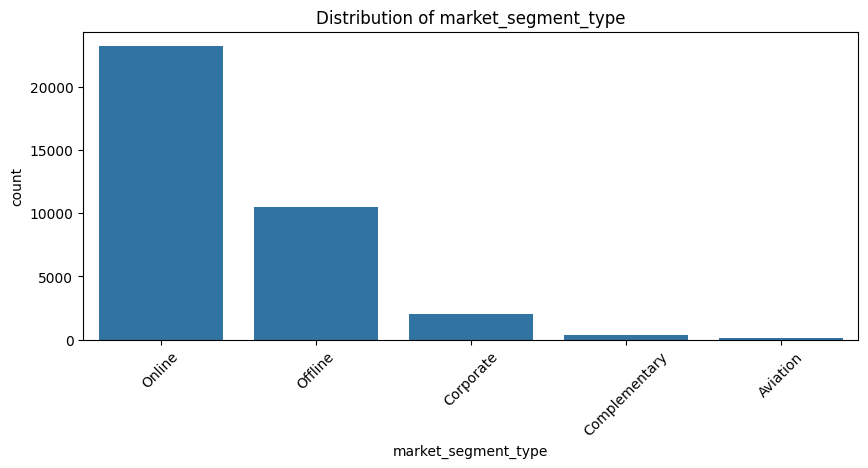

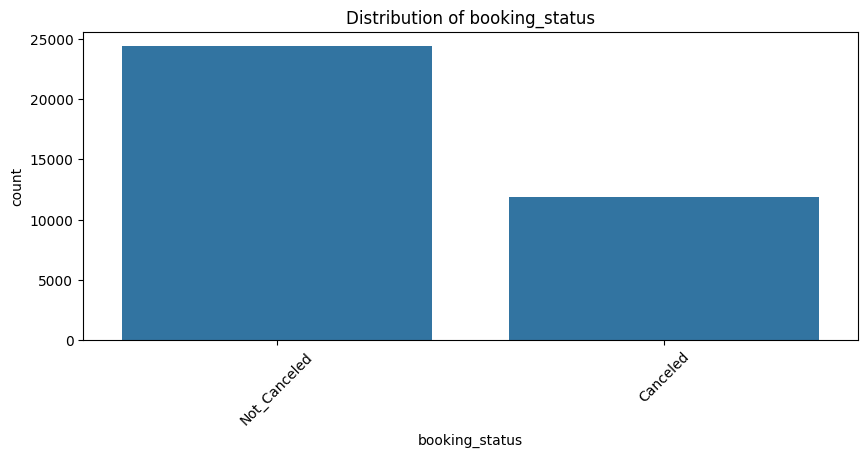

In [ ]:
for col in cat_cols:
    if col != 'Booking_ID':
        plt.figure(figsize=(10,4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()

- Status Pemesanan: Tingkat pembatalan relatif signifikan namun masih lebih rendah dibandingkan dengan pemesanan yang tidak dibatalkan.
- Segmen Pasar: Saluran online dan offline adalah sumber pemesanan utama.
- Tipe Kamar: Ada preferensi yang kuat terhadap tipe kamar tertentu ("Room_Type 1").
- Paket Makan: "Meal Plan 1" adalah pilihan paket makan yang paling populer.

#Preprocessing

##Handling Missing Value

In [ ]:
# Handle missing values

# Fill missing numerical values with median
num_cols_to_fill = ['avg_price_per_room', 'required_car_parking_space']
for col in num_cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
cat_cols_to_fill = ['type_of_meal_plan']
for col in cat_cols_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

handling missing value dengan cara
- Untuk data numerik, saya isi dengan data median supaya ga terpengaruh outlier. dan Median itu Mewakili nilai tengah, jadi lebih stabil saat data tidak terdistribusi normal.
- Untuk data kategori, Saya isi dengan nilai yang paling sering muncul yaitu nilai modus, supaya tetap mencerminkan pola umum yang terjadi di data."

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


Cek sudah tidak ada lagi missing value

##Feature Engineering

membuat, memodifikasi, atau memilih fitur (kolom) dalam dataset agar model bisa belajar lebih baik dan menghasilkan prediksi yang lebih akurat.

In [ ]:
# Create total nights stayed feature
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

- no_of_weekend_nights: jumlah malam menginap di akhir pekan (biasanya Sabtu dan Minggu)

- no_of_week_nights: jumlah malam menginap di hari kerja (Senin sampai Jumat)

membuat fitur total_nights untuk menyederhanakan informasi lama menginap dan memberikan model machine learning gambaran yang lebih jelas tentang durasi total tamu tinggal di hotel, karena durasi menginap dapat memengaruhi keputusan seperti pembatalan atau permintaan khusus.

In [ ]:
# Create total guests feature
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

total_guests dibuat untuk merepresentasikan jumlah keseluruhan tamu dalam satu pemesanan, dengan menjumlahkan tamu dewasa dan anak-anak. Hal ini dilakukan agar model dapat memahami kapasitas reservasi secara utuh, karena total jumlah tamu dapat memengaruhi kebutuhan kamar, fasilitas tambahan, maupun kemungkinan pembatalan pemesanan.

In [ ]:
# Create booking season feature based on arrival_month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

mengelompokkan bulan kedatangan (arrival_month) ke dalam beberapa musim:

- Desember, Januari, Februari → 'Winter' (Musim Dingin)

- Maret, April, Mei → 'Spring' (Musim Semi)

- Juni, Juli, Agustus → 'Summer' (Musim Panas)

- September, Oktober, November → 'Fall' (Musim Gugur)


mengelompokkan bulan kedatangan tamu ke dalam kategori musim (Winter, Spring, Summer, Fall), berdasarkan nilai pada kolom arrival_month. Pembuatan fitur ini bertujuan agar model dapat mengenali pola musiman dalam perilaku pemesanan, karena musim tertentu bisa memengaruhi jumlah tamu, harga, dan kemungkinan pembatalan.

In [ ]:
df['booking_season'] = df['arrival_month'].apply(get_season)

membuat fitur baru bernama booking_season, yang menunjukkan musim kedatangan tamu berdasarkan nilai pada kolom arrival_month

In [ ]:
# Drop unnecessary columns
df.drop(['Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year'], axis=1, inplace=True)

drop data yang tidak terlalu dibutuhkan

- Booking Id = karena Identifier dan tidak punya nilai informasi (informasi prediktif) untuk model machine learning.
- 'arrival_date', 'arrival_month', 'arrival_year' =
Kurang Relevan dan tidak terlalu penting untuk prediksi pembatalan hotel


- Kenapa kolom no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights tidak dihapus?

Meskipun sudah dibuat fitur turunan, kolom asli bisa tetap mengandung pola unik (misalnya: tamu mungkin lebih sering membatalkan jika menginap banyak malam di weekend).

Model Machine Learning Dapat Memanfaatkan Keduanya:
Algoritma seperti XGBoost/Random Forest bisa otomatis memilih fitur yang paling relevan.

##Data Splitting

In [ ]:
# Prepare features and target
X = df.drop('booking_status', axis=1)
y = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Scaling

In [ ]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

- StandardScaler cocok untuk data yang tidak berdistribusi normal karena hanya mengubah skala tanpa asumsi distribusi tertentu
- Membuat nilai setiap fitur memiliki rata-rata 0 dan standar deviasi 1 → penting agar semua fitur berada dalam skala yang sama.

In [ ]:
# Define preprocessing steps
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


##Encoding

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


- Buat pipeline (alur proses) untuk data kategorikal.
- Pakai OneHotEncoder untuk mengubah nilai kategorikal menjadi bentuk numerik biner (0/1) agar bisa diproses model.

membuat pipeline otomatis untuk membersihkan dan mengubah data sebelum masuk ke model. Kolom kategorikal diubah ke bentuk numerik lewat one-hot encoding, dan kolom numerik diproses secara terpisah. Semua ini digabung ke satu objek (preprocessor) yang nanti bisa langsung dipasang ke model seperti RandomForest, LogisticRegression, dll."

#Model Training

###RANDOM FOREST

####Classification Report

In [ ]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4878
           1       0.87      0.79      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



Berdasarkan hasil classification report, model mampu mengenali dengan sangat baik booking yang tidak dibatalkan (kelas 0) dengan precision 90% dan recall 94%, sementara untuk booking yang dibatalkan (kelas 1), model cukup baik dengan precision 87% dan recall 79%, yang menunjukkan bahwa masih ada sebagian pembatalan yang terlewat. Secara keseluruhan, akurasi model cukup tinggi yaitu 89%, dan nilai f1-score juga menunjukkan performa yang seimbang dan stabil antar kelas.

####Confusion Matrix

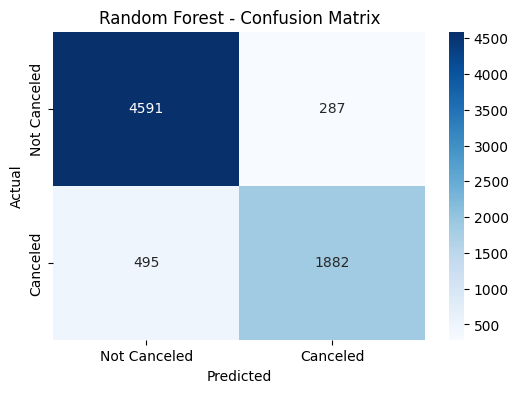

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- True Negative (TN): 4591 - Ini adalah jumlah pemesanan yang sebenarnya tidak dibatalkan dan diprediksi dengan benar sebagai "Not Canceled" oleh model.
- False Positive (FP): 287 - Ini adalah jumlah pemesanan yang sebenarnya tidak dibatalkan tetapi diprediksi sebagai "Canceled" oleh model. Ini juga dikenal sebagai Type I error.
- False Negative (FN): 495 - Ini adalah jumlah pemesanan yang sebenarnya dibatalkan tetapi diprediksi sebagai "Not Canceled" oleh model. Ini juga dikenal sebagai Type II error.
- True Positive (TP): 1882 - Ini adalah jumlah pemesanan yang sebenarnya dibatalkan dan diprediksi dengan benar sebagai "Canceled" oleh model.

- Model berhasil memprediksi dengan benar sebagian besar pemesanan yang tidak dibatalkan (TN = 4591).
- Kesalahan Tipe I (False Positive) Relatif Rendah: Ada sejumlah kecil pemesanan yang sebenarnya tidak dibatalkan tetapi salah diprediksi sebagai dibatalkan (FP = 287).
- Kesalahan Tipe II (False Negative) Cukup Signifikan: Ada sejumlah pemesanan yang sebenarnya dibatalkan tetapi salah diprediksi sebagai tidak dibatalkan (FN = 495). Ini berarti model gagal mengidentifikasi sejumlah pemesanan yang akhirnya dibatalkan.
- Model berhasil memprediksi dengan benar sejumlah pemesanan yang dibatalkan (TP = 1882), tetapi jumlah false negative menunjukkan bahwa masih ada ruang untuk peningkatan dalam memprediksi kelas "Canceled".

####ROC Curve

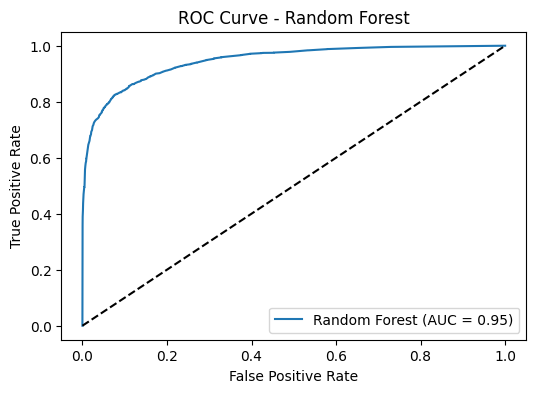

In [ ]:
# ROC Curve
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score,
                            classification_report, confusion_matrix,
                            roc_curve, precision_recall_curve)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

Kurva ROC dan nilai AUC untuk model Random Forest ini menunjukkan kinerja klasifikasi yang sangat baik dalam memprediksi status pembatalan pemesanan. Model ini mampu mencapai True Positive Rate yang tinggi dengan False Positive Rate yang relatif rendah. Nilai AUC sebesar 0.95 mengkonfirmasi bahwa model memiliki kemampuan klasifikasi yang kuat dan jauh lebih baik daripada klasifikasi acak. Ini adalah indikasi yang baik bahwa model Random Forest efektif dalam memprediksi apakah suatu pemesanan akan dibatalkan atau tidak.

####Feature Importance

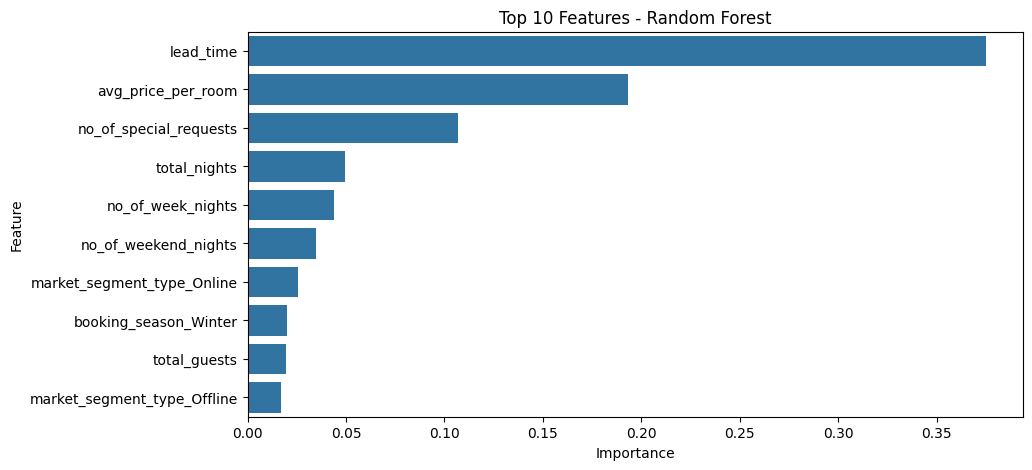

In [ ]:
#Feature Importance
rf_model = rf_pipeline.named_steps['classifier']
importances = rf_model.feature_importances_
feature_names = np.concatenate([
    numerical_cols,
    rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
])

top_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) \
               .sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Features - Random Forest')
plt.show()

- lead_time adalah fitur yang paling penting secara signifikan. Panjang batangnya jauh lebih besar dibandingkan fitur lainnya, dengan nilai kepentingan sekitar 0.37. Ini menunjukkan bahwa berapa lama waktu antara pemesanan dan tanggal kedatangan adalah faktor yang sangat kuat dalam memprediksi apakah suatu pemesanan akan dibatalkan atau tidak.

- avg_price_per_room adalah fitur penting kedua. Dengan nilai kepentingan di atas 0.18, harga rata-rata per kamar juga memiliki pengaruh yang besar terhadap prediksi.

lead time dan harga rata-rata per kamar menjadi indikator yang paling kuat. Memahami kepentingan fitur ini dapat membantu dalam pengambilan keputusan, seperti menyesuaikan harga berdasarkan lead time atau menawarkan insentif berdasarkan jumlah permintaan khusus.

##XGBOOST

####Classification Report

In [ ]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Training
xgb_pipeline.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4878
           1       0.86      0.79      0.82      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



Berdasarkan hasil classification report, model XGBoost mampu mengenali dengan sangat baik booking yang tidak dibatalkan (kelas 0) dengan precision 90% dan recall 94%, sementara untuk booking yang dibatalkan (kelas 1), model cukup baik dengan precision 86% dan recall 79%, yang menunjukkan bahwa masih ada sebagian pembatalan yang belum berhasil dikenali oleh model. Secara keseluruhan, akurasi model berada pada angka yang cukup tinggi yaitu 89%, dan nilai f1-score menunjukkan performa yang konsisten dan seimbang antara kedua kelas.

####Confusion Matrix

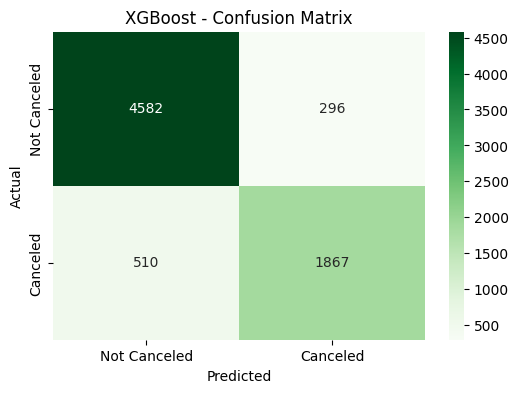

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Negative (TN): 4582 - Jumlah pemesanan yang sebenarnya tidak dibatalkan dan diprediksi dengan benar sebagai "Not Canceled" oleh model XGBoost.
- False Positive (FP): 296 - Jumlah pemesanan yang sebenarnya tidak dibatalkan tetapi diprediksi sebagai "Canceled" oleh model XGBoost (Type I error).
- False Negative (FN): 510 - Jumlah pemesanan yang sebenarnya dibatalkan tetapi diprediksi sebagai "Not Canceled" oleh model XGBoost (Type II error).
- True Positive (TP): 1867 - Jumlah pemesanan yang sebenarnya dibatalkan dan diprediksi dengan benar sebagai "Canceled" oleh model XGBoost.

- Model berhasil memprediksi dengan benar sebagian besar pemesanan yang tidak dibatalkan (TN = 4582).
- Kesalahan Tipe I (False Positive) Relatif Rendah: Sejumlah kecil pemesanan yang sebenarnya tidak dibatalkan salah diprediksi sebagai dibatalkan (FP = 296).
- Kesalahan Tipe II (False Negative) Cukup Signifikan: Sejumlah pemesanan yang sebenarnya dibatalkan salah diprediksi sebagai tidak dibatalkan (FN = 510). Ini menunjukkan bahwa model melewatkan sejumlah pemesanan yang akhirnya dibatalkan.
- Model berhasil memprediksi dengan benar sejumlah pemesanan yang dibatalkan (TP = 1867).

####ROC Curve

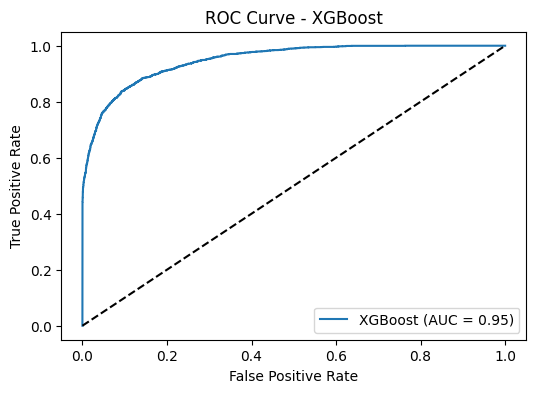

In [ ]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6,4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

Kurva ROC dan nilai AUC untuk model XGBoost ini menunjukkan kinerja klasifikasi yang sangat baik dalam memprediksi status pembatalan pemesanan. Model ini mampu mencapai True Positive Rate yang tinggi dengan False Positive Rate yang relatif rendah. Nilai AUC sebesar 0.95 mengkonfirmasi bahwa model memiliki kemampuan klasifikasi yang kuat dan jauh lebih baik daripada tebakan acak.

####Feature Importance

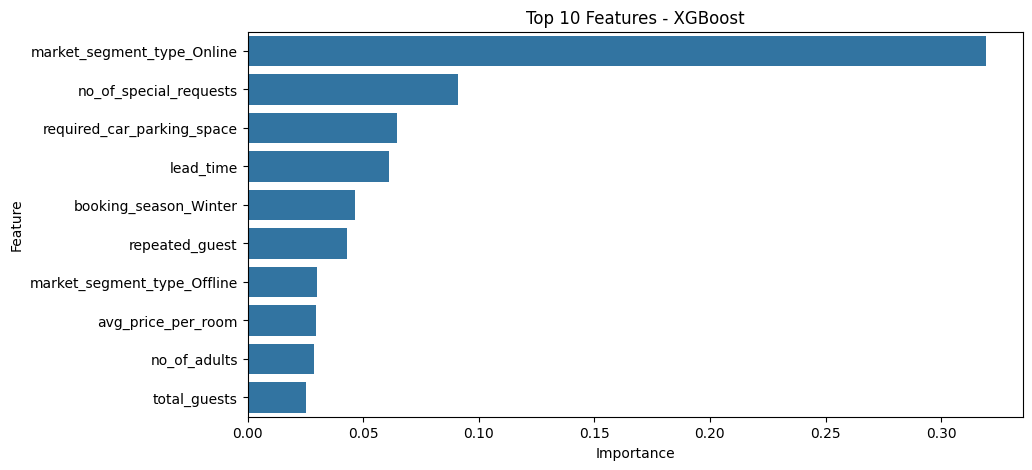

In [ ]:
# Feature Importance
xgb_model = xgb_pipeline.named_steps['classifier']
importances = xgb_model.feature_importances_

top_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) \
               .sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Features - XGBoost')
plt.show()

- market_segment_type_Online adalah fitur yang paling penting secara signifikan. Panjang batangnya paling besar, dengan nilai kepentingan di atas 0.3. Ini menunjukkan bahwa segmen pasar online adalah faktor yang sangat kuat dalam memprediksi apakah suatu pemesanan akan dibatalkan atau tidak.

- no_of_special_requests adalah fitur penting kedua. Dengan nilai kepentingan sekitar 0.09, jumlah permintaan khusus yang dibuat oleh tamu juga memiliki pengaruh yang cukup besar.

Segmen pasar online dan jumlah permintaan khusus tampaknya menjadi indikator yang sangat penting bagi model XGBoost.

#Compare Model

,Metric,Random Forest,XGBoost
0,Accuracy,0.892212,0.888904
1,ROC AUC,0.946533,0.949071
2,F1 Score,0.827981,0.822467


<Figure size 1000x500 with 0 Axes>

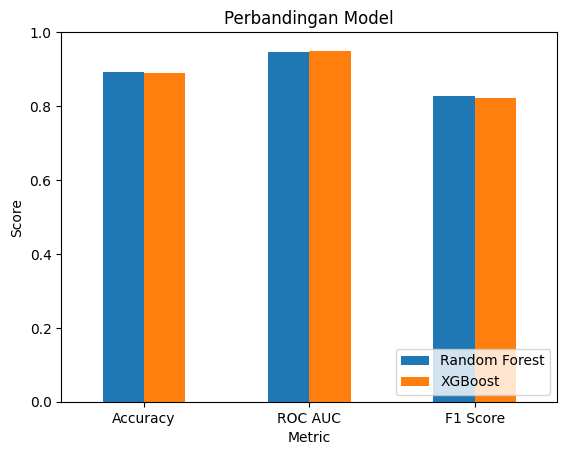

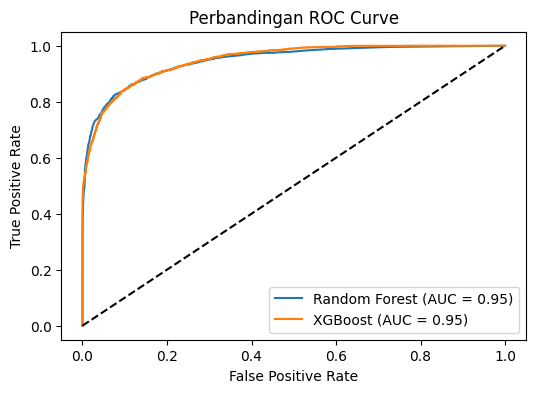

In [ ]:
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC', 'F1 Score'],
    'Random Forest': [accuracy_rf, roc_auc_rf, f1_rf],
    'XGBoost': [accuracy_xgb, roc_auc_xgb, f1_xgb]
})

# Tampilkan tabel
display(comparison)

# Visualisasi perbandingan
plt.figure(figsize=(10,5))
comparison.set_index('Metric').plot(kind='bar', rot=0)
plt.title('Perbandingan Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perbandingan ROC Curve')
plt.legend()
plt.show()

- Random Forest unggul di Accuracy (+0.33%) dan F1-Score (+0.55%).

- XGBoost unggul tipis di ROC AUC (+0.26%).


- ROC AUC (XGBoost 0.9491): Lebih baik dalam membedakan kelas secara keseluruhan.

- F1-Score (RF 0.8280): Lebih seimbang antara precision dan recall untuk kelas minoritas (Canceled).

dari hasil diatas kita bisa lihat bahwa Random Forest model lebih unggul dibandingkan dengan XGBOOST model, tapi untuk lebih memastikannya lagi kita lakukan fine tuning untuk kedua model tersebut

#FINE TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk Random Forest
rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': [None, 'balanced']
}

# Parameter grid untuk XGBoost
xgb_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]  # Handle class imbalance
}

In [ ]:
# Tuning Random Forest
rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

# Tuning XGBoost
xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 6],
                         'classifier__n_estimators': [100, 200],
                         'classifier__scale_pos_weight': [1,
                                                          2.0521665965502733],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

=== Random Forest (Tuned) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4878
           1       0.84      0.82      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255

Accuracy: 0.8921
ROC AUC: 0.9525
F1-Score: 0.8335


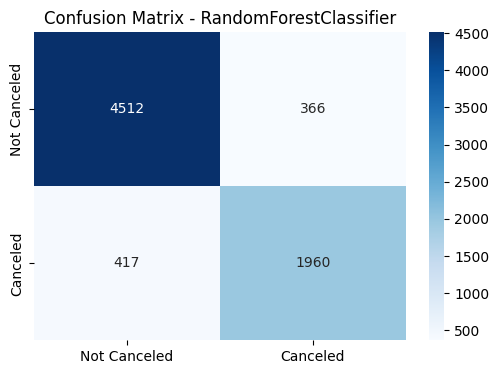


=== XGBoost (Tuned) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4878
           1       0.79      0.85      0.82      2377

    accuracy                           0.88      7255
   macro avg       0.86      0.87      0.87      7255
weighted avg       0.88      0.88      0.88      7255

Accuracy: 0.8799
ROC AUC: 0.9499
F1-Score: 0.8235


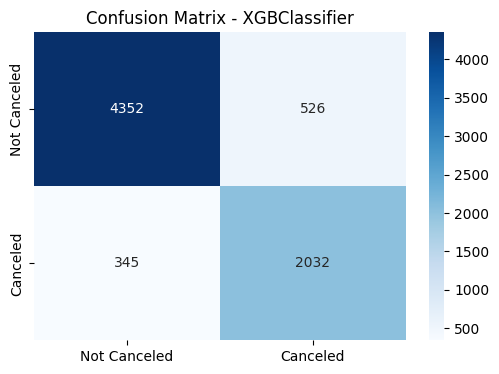

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Canceled', 'Canceled'],
                yticklabels=['Not Canceled', 'Canceled'])
    plt.title(f'Confusion Matrix - {type(model.named_steps["classifier"]).__name__}')
    plt.show()

# Evaluasi kedua model
print("=== Random Forest (Tuned) ===")
evaluate_model(rf_grid.best_estimator_, X_test, y_test)

print("\n=== XGBoost (Tuned) ===")
evaluate_model(xgb_grid.best_estimator_, X_test, y_test)

#Compare Model Setelah Fine Tuning

,Metric,Random Forest (Tuned),XGBoost (Tuned)
0,Accuracy,0.892074,0.879945
1,ROC AUC,0.952464,0.949857
2,F1-Score,0.833511,0.823506


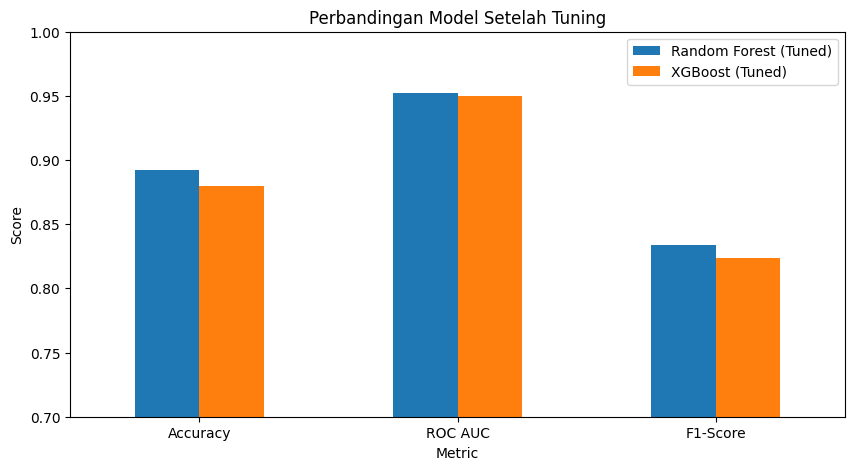

In [ ]:
# Hasil metrik dalam dataframe
results = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC', 'F1-Score'],
    'Random Forest (Tuned)': [
        accuracy_score(y_test, rf_grid.predict(X_test)),
        roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:, 1]),
        f1_score(y_test, rf_grid.predict(X_test))
    ],
    'XGBoost (Tuned)': [
        accuracy_score(y_test, xgb_grid.predict(X_test)),
        roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:, 1]),
        f1_score(y_test, xgb_grid.predict(X_test))
    ]
})

display(results)

# Visualisasi perbandingan
results.set_index('Metric').plot(kind='bar', rot=0, figsize=(10,5))
plt.title('Perbandingan Model Setelah Tuning')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.show()

Berdasarkan ketiga metrik (Accuracy, ROC AUC, dan F1-Score), Random Forest (Tuned) sedikit unggul dibandingkan XGBoost. Perbedaannya memang tidak terlalu jauh, tapi lebih konsisten unggul di semua aspek evaluasi.

- Accuracy lebih tinggi = Model lebih akurat secara umum

- ROC AUC lebih tinggi = Lebih baik dalam membedakan kelas positif dan negatif (discriminative power)

- F1-Score lebih tinggi = Lebih seimbang antara precision dan recall, penting terutama jika datanya tidak seimbang


Jadi Kesimpulannya Random Forest (Tuned) adalah model yang lebih baik untuk digunakan karena memberikan hasil performa terbaik secara keseluruhan dari segi akurasi, kemampuan klasifikasi, dan keseimbangan prediksi antar kelas.